<a href="https://colab.research.google.com/github/tanu-17/NY_Air_Quality_Analysis/blob/main/Air_Quality_Analysis%20(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Air Quality Analysis and Forecasting

### 1. Loading and Inspecting the Dataset

##### We are doing this step to familiarize ourselves with the structure, data types, and quality of the datasets, which will help us in planning preprocessing steps.

In [ ]:
import pandas as pd
import numpy as np

# Loading the datasets
air_quality_data = pd.read_csv(r"C:\Users\lenovo\Documents\MS documents\Classes\IST 652\Project\Air_Quality.csv")
health_data = pd.read_csv(r"C:\Users\lenovo\Documents\MS documents\Classes\IST 652\Project\Health_Data.csv")

# Displaying the first few rows of each dataset for inspection
print("Air Quality Data:")
print(air_quality_data.head())
print("\nHealth Data:")
print(health_data.head())

# Checking for missing values if any and also the data types
print("\nAir Quality Data Info:")
print(air_quality_data.info())
print("\nHealth Data Info:")
print(health_data.info())


Air Quality Data:
    TimePeriod GeoType  GeoID  GeoRank                Geography  \
0  Summer 2021   UHF42    101        4  Kingsbridge - Riverdale   
1  Summer 2021   UHF42    102        4          Northeast Bronx   
2  Summer 2021   UHF42    103        4       Fordham - Bronx Pk   
3  Summer 2021   UHF42    104        4     Pelham - Throgs Neck   
4  Summer 2021   UHF42    105        4         Crotona -Tremont   

   Nitric Oxide Mean ppb  PM2.5 Mean mcg/m3  \
0                    4.9                8.7   
1                    5.6                8.5   
2                    5.6                8.7   
3                    6.4                8.5   
4                    8.2                8.7   

   Black Carbon Mean absorbance units  Nitrogen Dioxide Mean ppb  
0                                 0.7                       10.8  
1                                 0.7                       12.4  
2                                 0.7                       12.1  
3                           

### 2. Data Cleaning and Preprocessing

##### We are doing this step to handle missing data and ensure a uniform format, which will make it suitable for analysis.

In [ ]:
air_quality_data['Year'] = air_quality_data['TimePeriod'].str.extract(r'(\d{4})').astype(int)
air_quality_data['Season'] = air_quality_data['TimePeriod'].str.extract(r'([A-Za-z]+)')[0]

# Convert the 'Season' column into dummy variables (one-hot encoding)
air_quality_data = pd.get_dummies(air_quality_data, columns=['Season'])

# Drop the original 'TimePeriod' column as it has been transformed
air_quality_data = air_quality_data.drop(columns=['TimePeriod'])

##### Here, we divided the "TimePeriod" column into "Year" and "Season" for using it in further analysis as it was throwing some errors while directly using the column for EDA because we were not able to plot some of the visualizations. And since we did not need the same column as we had already divided it, we dropped it.

In [ ]:
# Splitting the 'TimePeriod' column into start and end years to convert them to integers
health_data['StartYear'] = health_data['TimePeriod'].str.split('-').str[0].astype(int)
health_data['EndYear'] = health_data['TimePeriod'].str.split('-').str[1].astype(int)

# Checking for total missing values in each dataset
print("Missing values in Air Quality Data:")
print(air_quality_data.isnull().sum())
print("\nMissing values in Health Data:")
print(health_data.isnull().sum())


Missing values in Air Quality Data:
GeoType                               0
GeoID                                 0
GeoRank                               0
Geography                             0
Nitric Oxide Mean ppb                 0
PM2.5 Mean mcg/m3                     0
Black Carbon Mean absorbance units    0
Nitrogen Dioxide Mean ppb             0
Year                                  0
Season_Summer                         0
Season_Winter                         0
dtype: int64

Missing values in Health Data:
TimePeriod                                                                                                    0
GeoType                                                                                                       0
GeoID                                                                                                         0
GeoRank                                                                                                       0
Geography                      

##### Since there are 84 missing values in one of the columns in health dataset, we will be imputing those values with mean as it is a large portion of dataset to be dropped and it will significantly affect the results.

In [ ]:
# Filling the missing values in the specific column with the mean values
health_data['Deaths due to PM2.5 Estimated annual rate (age 30+) per 100,000 adults'] = \
    health_data['Deaths due to PM2.5 Estimated annual rate (age 30+) per 100,000 adults'].fillna(
        health_data['Deaths due to PM2.5 Estimated annual rate (age 30+) per 100,000 adults'].mean()
    )

# Verifying if there are still any missing values
print("Missing values after imputation:")
print(health_data.isnull().sum())


Missing values after imputation:
TimePeriod                                                                                                   0
GeoType                                                                                                      0
GeoID                                                                                                        0
GeoRank                                                                                                      0
Geography                                                                                                    0
Deaths due to PM2.5 Estimated annual number (age 30+)                                                        0
Deaths due to PM2.5 Estimated annual rate (age 30+) per 100,000 adults                                       0
Asthma emergency department visits due to PM2.5 Estimated annual number (age 18+)                            0
Asthma emergency department visits due to PM2.5 Estimated annual number (under 

### 3. Exploratory Data Analysis (EDA)

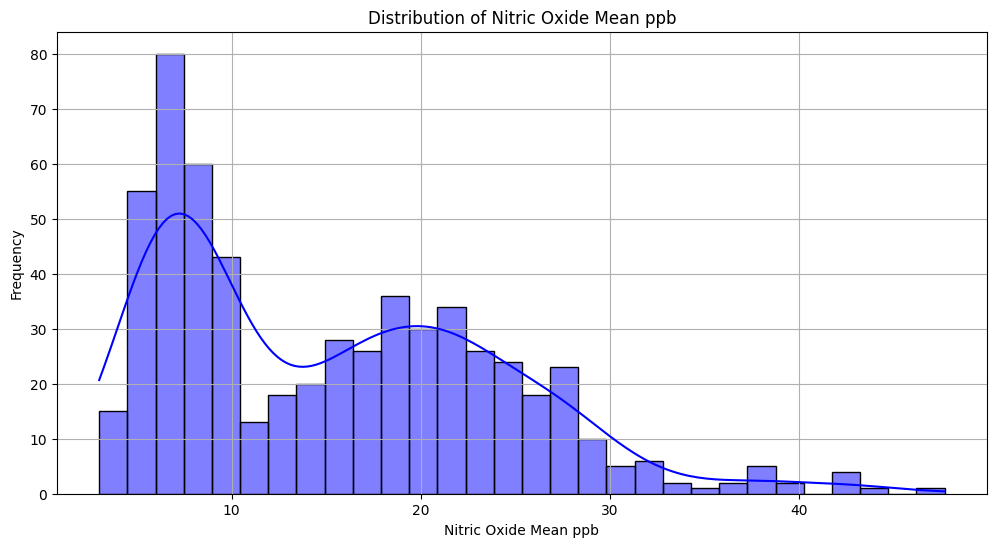

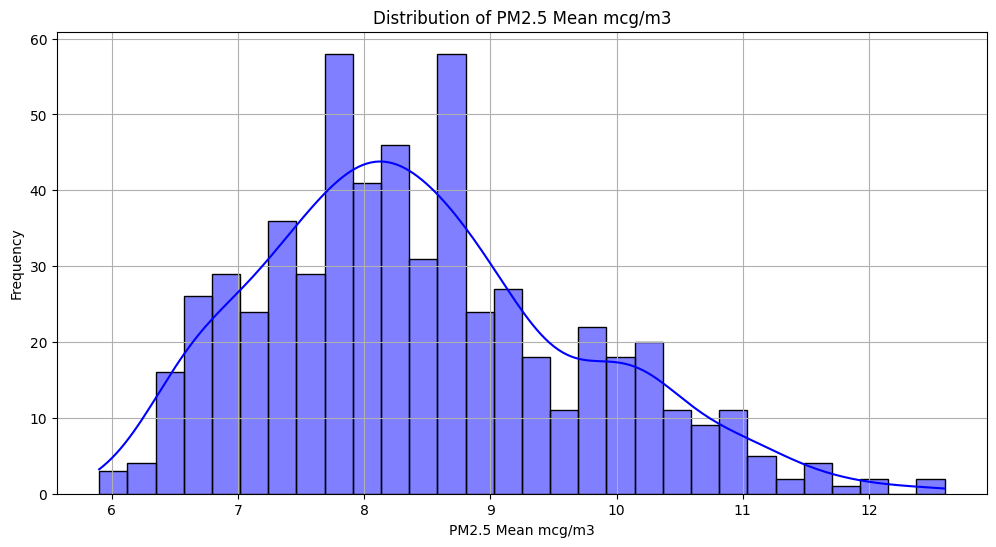

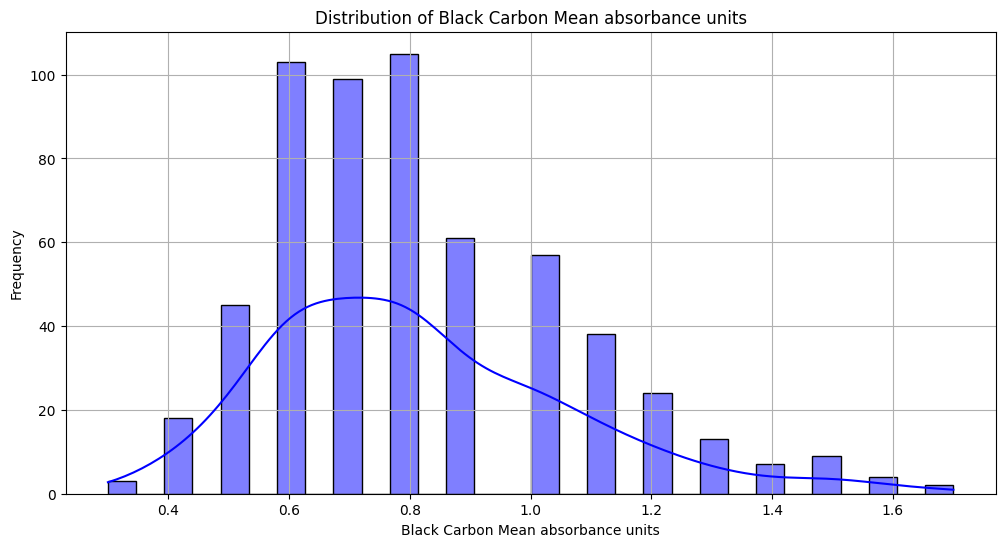

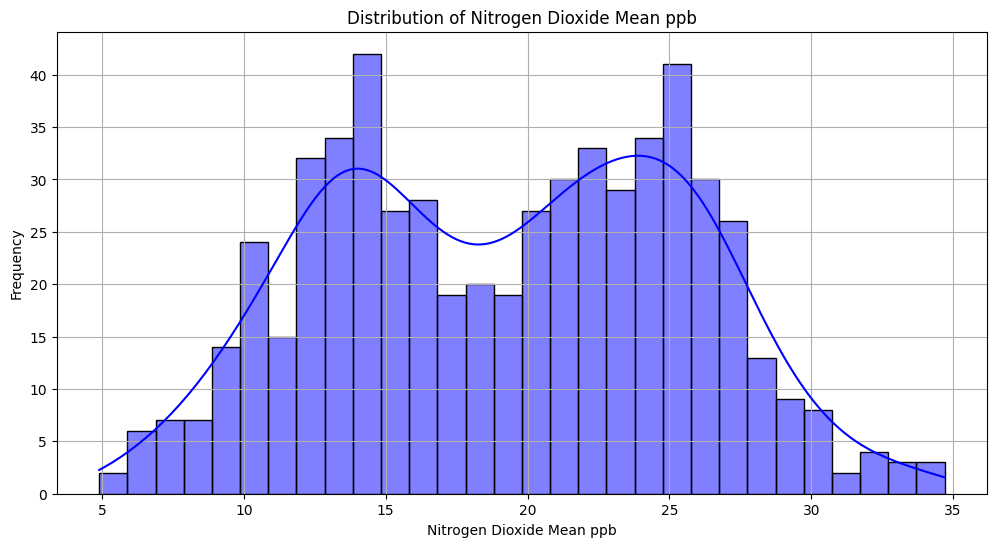

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pollutants = ['Nitric Oxide Mean ppb', 'PM2.5 Mean mcg/m3',
              'Black Carbon Mean absorbance units', 'Nitrogen Dioxide Mean ppb']

# Plotting histograms for each pollutant
for pollutant in pollutants:
    plt.figure(figsize=(12, 6))
    sns.histplot(air_quality_data[pollutant], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {pollutant}')
    plt.xlabel(f'{pollutant}')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    print("\n")
    print("\n")

##### We have plotted this time-series graphs to show the distribution of different pollutants to get an idea about their spread.

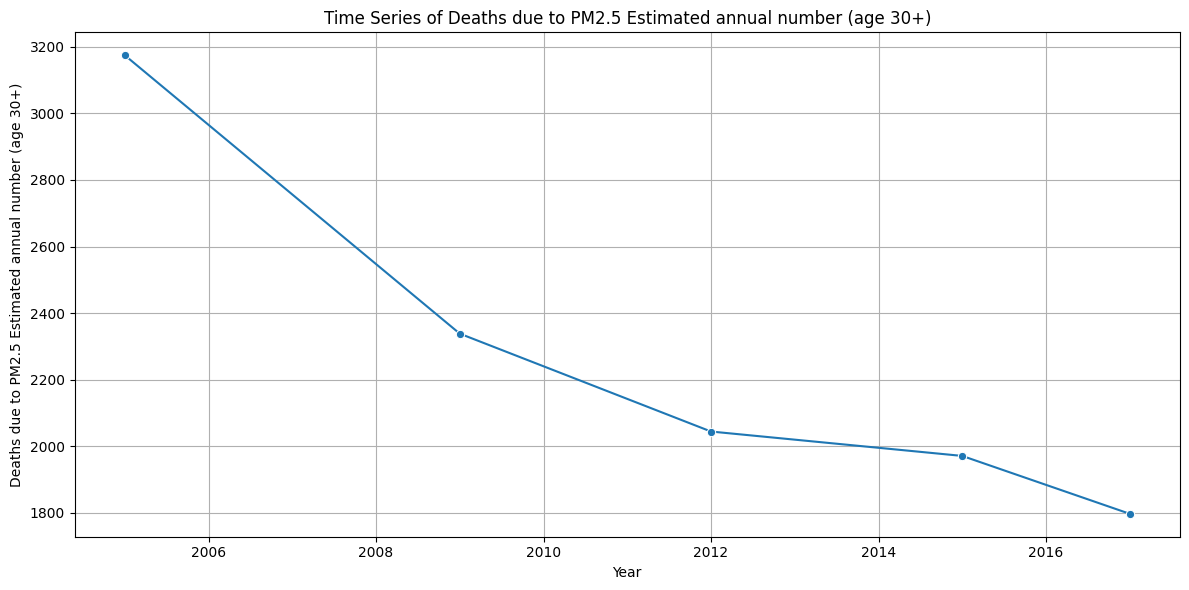

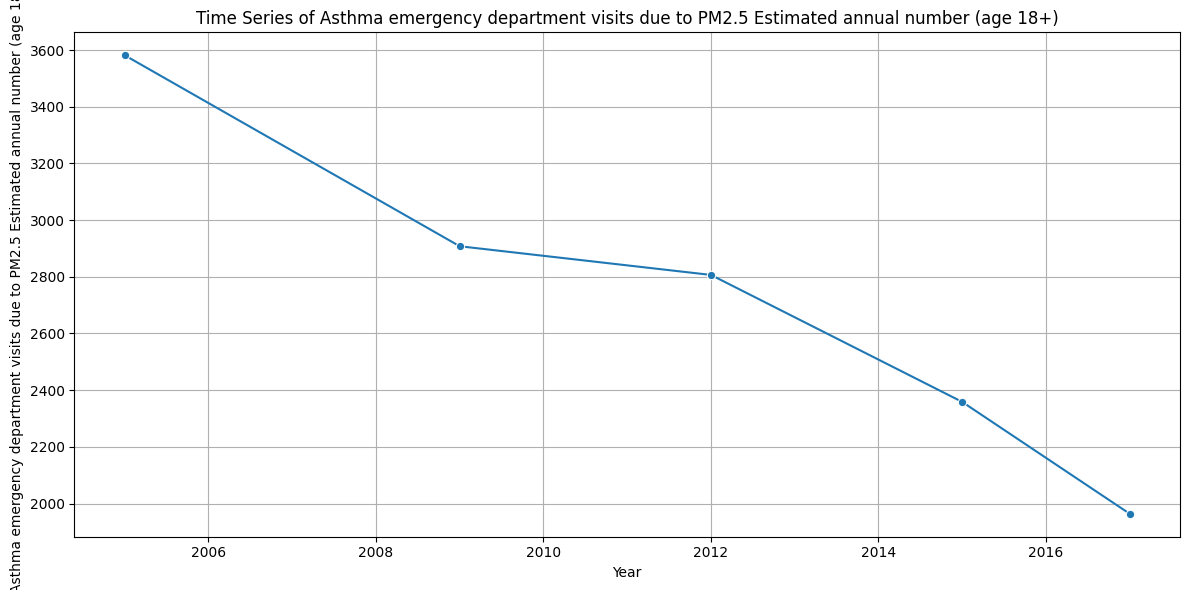

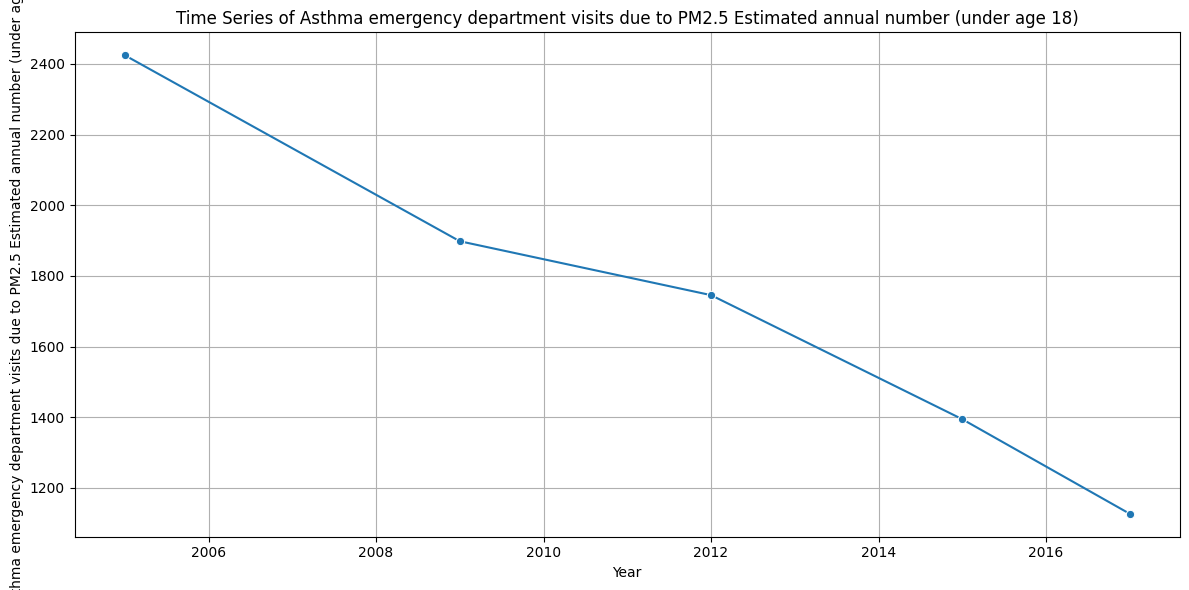

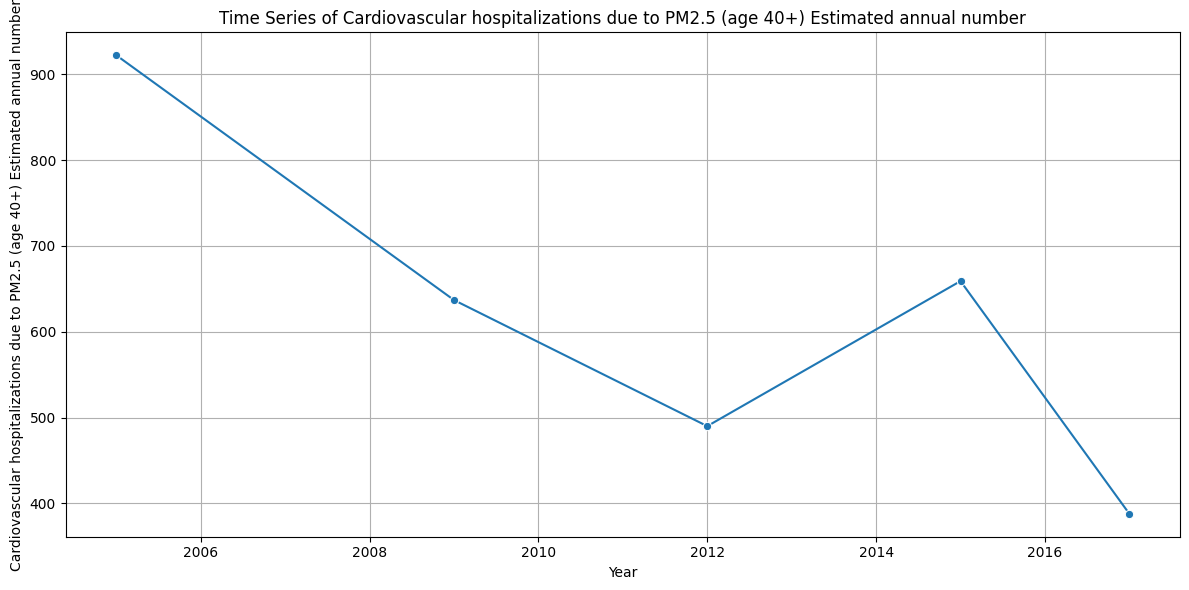

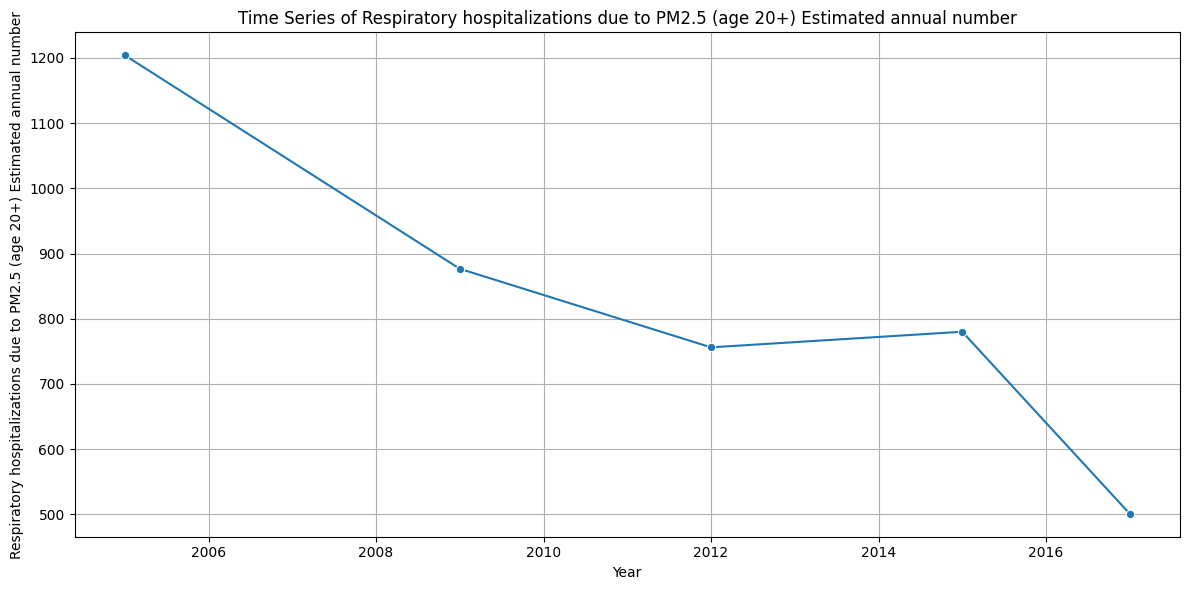

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

aggregated_data = health_data.groupby('StartYear').sum()

columns_to_plot = [
    'Deaths due to PM2.5 Estimated annual number (age 30+)',
    'Asthma emergency department visits due to PM2.5 Estimated annual number (age 18+)',
    'Asthma emergency department visits due to PM2.5 Estimated annual number (under age 18)',
    'Cardiovascular hospitalizations due to PM2.5 (age 40+) Estimated annual number',
    'Respiratory hospitalizations due to PM2.5 (age 20+) Estimated annual number'
]

# Plotting time series for each health-related column
for column in columns_to_plot:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=aggregated_data, x='StartYear', y=column, marker='o')
    plt.title(f'Time Series of {column}')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


##### We plotted this trend line graphs to see the trends of health effects due to various age factors and how PM2.5 have affected each of them.

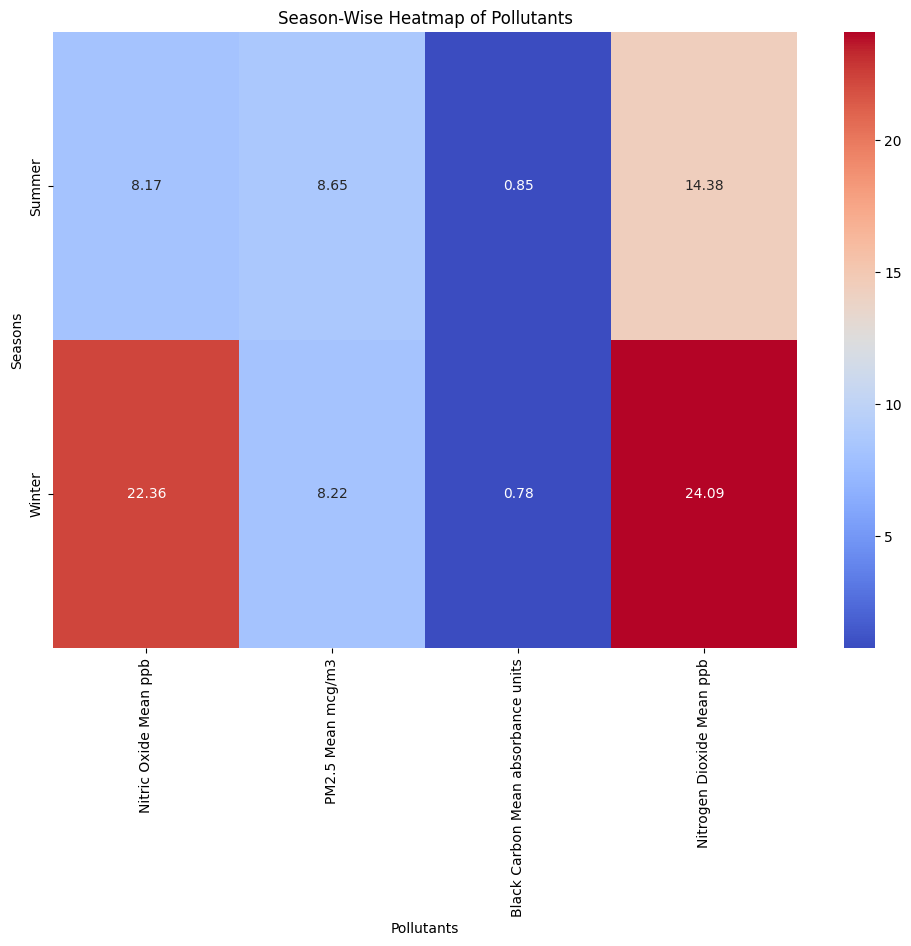

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a mapping of dummy variables to season names for grouping
season_columns = [col for col in air_quality_data.columns if col.startswith('Season_')]
season_mapping = {col: col.split('_')[1] for col in season_columns}

# Adding a "Season" column back using the mapping
for col, season in season_mapping.items():
    air_quality_data.loc[air_quality_data[col] == 1, 'Season_Label'] = season

# Aggregating data by season labels
pollutants = ['Nitric Oxide Mean ppb', 'PM2.5 Mean mcg/m3',
              'Black Carbon Mean absorbance units', 'Nitrogen Dioxide Mean ppb']

seasonal_data = air_quality_data.groupby('Season_Label')[pollutants].mean()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(seasonal_data, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Season-Wise Heatmap of Pollutants")
plt.xlabel("Pollutants")
plt.ylabel("Seasons")
plt.show()


##### As you can see in this heatmap, the reason behind plotting this was to understand how each pollutant was making a difference based on different season. It helped us understand Nitric Oxide as well as Nitrogen Dioxide were the pollutants that were mostly effective in winters and while PM2.5 and Black Carbon were effective in both summer and winter equally.

In [ ]:
# Creating a list of neighborhoods for NYC
neighborhoods = [
    'Kingsbridge - Riverdale', 'Northeast Bronx', 'Fordham - Bronx Pk', 'Pelham - Throgs Neck',
    'Crotona - Tremont', 'High Bridge - Morrisania', 'Hunts Point - Mott Haven', 'Greenpoint',
    'Downtown - Heights - Slope', 'Bedford Stuyvesant - Crown Heights', 'East New York',
    'Sunset Park', 'Borough Park', 'East Flatbush - Flatbush', 'Canarsie - Flatlands',
    'Bensonhurst - Bay Ridge', 'Coney Island - Sheepshead Bay', 'Williamsburg - Bushwick',
    'Washington Heights', 'Central Harlem - Morningside Heights', 'East Harlem', 'Upper West Side',
    'Upper East Side', 'Chelsea - Clinton', 'Gramercy Park - Murray Hill', 'Greenwich Village - SoHo',
    'Union Square - Lower East Side', 'Lower Manhattan', 'Long Island City - Astoria', 'West Queens',
    'Flushing - Clearview', 'Bayside - Little Neck', 'Ridgewood - Forest Hills', 'Fresh Meadows',
    'Southwest Queens', 'Jamaica', 'Southeast Queens', 'Rockaways', 'Port Richmond',
    'Stapleton - St. George', 'Willowbrook', 'South Beach - Tottenville'
]

unique_neighborhoods = list(set(neighborhoods))

In [ ]:
import pandas as pd
import time
import plotly.express as px
import requests

# Checking for necessary columns if they are in the data
if 'Geography' not in air_quality_data.columns:
    raise ValueError("The 'Geography' column is missing in the dataset.")

# Dropping duplicate neighborhoods for geocoding
neighborhoods = air_quality_data['Geography'].drop_duplicates().tolist()

# Creating a function to fetch coordinates using OpenCage Geocoder API
def fetch_coordinates_opencage(neighborhood, api_key):
    url = f"https://api.opencagedata.com/geocode/v1/json?q={neighborhood}, New York, USA&key={api_key}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        if data['results']:
            coords = data['results'][0]['geometry']
            return coords['lat'], coords['lng']
    print(f"Failed to fetch coordinates for {neighborhood}.")
    return None, None

OPEN_CAGE_API_KEY = '5dab1ab710ac47419dd20d1dd4d80a62'

geo_data_list = []
for neighborhood in neighborhoods:
    lat, lon = fetch_coordinates_opencage(neighborhood, OPEN_CAGE_API_KEY)
    geo_data_list.append({'Neighborhood': neighborhood, 'Latitude': lat, 'Longitude': lon})
    time.sleep(1)

# Converting the geocoded data to DataFrame
geo_data = pd.DataFrame(geo_data_list)

# Merging the geocoded data with air quality data
merged_data = pd.merge(air_quality_data, geo_data, left_on='Geography', right_on='Neighborhood', how='left')

# Filling missing coordinates with NYC central default
merged_data['Latitude'].fillna(40.7128)  # Setting the NYC latitude as default
merged_data['Longitude'].fillna(-74.0060)  # Seting the NYC longitude as default

# Plotting maps for each pollutant
pollutant_columns = ['Nitric Oxide Mean ppb', 'PM2.5 Mean mcg/m3',
                     'Black Carbon Mean absorbance units', 'Nitrogen Dioxide Mean ppb']

for pollutant_column in pollutant_columns:
    if pollutant_column in merged_data.columns:
        fig = px.scatter_mapbox(
            merged_data,
            lat='Latitude',
            lon='Longitude',
            color=pollutant_column,
            size=pollutant_column,
            hover_name='Geography',
            title=f"{pollutant_column} Concentrations Across NYC Neighborhoods",
            mapbox_style='carto-positron',
            color_continuous_scale=px.colors.sequential.Viridis,
            zoom=10,
            center={"lat": 40.7128, "lon": -74.0060}
        )
        fig.show()



##### As you can see from above created geographical graphs, these graphs show the concentration of each pollutant in the neighborhoods and its density. If you hover over the data points you can see the concentration of that particular pollutant in that region. It basically gives out an idea on where the air quality is good and where is it bad so that the reguations can be made accordingly to manage the AQI.

##### Creating a feature set from the air quality dataset that includes relevant features. Also, splitting the data into training and test sets.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Selecting the relevant columns for modeling and splitting them into features and target
X = air_quality_data[['Nitric Oxide Mean ppb', 'Year', 'Season_Summer', 'Season_Winter', 'GeoID',
                     'Black Carbon Mean absorbance units', 'Nitrogen Dioxide Mean ppb']]
y = air_quality_data['PM2.5 Mean mcg/m3']

# Making a copy of X to avoid modifying a view
X = X.copy()

# One-hot encoding the 'GeoID' column to represent it as separate binary columns
X = pd.get_dummies(X, columns=['GeoID'], drop_first=True)


# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verifying the shape of the training and test sets
print(f"Training features shape: {X_train_scaled.shape}")
print(f"Test features shape: {X_test_scaled.shape}")


Training features shape: (470, 47)
Test features shape: (118, 47)


### 4. Model Selection and Training

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initializing the Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Training the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Displaying the results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

# Displaying feature importances for insight
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)


Mean Squared Error (MSE): 0.17
R-squared (R2) Score: 0.91

Feature Importances:
                               Feature  Importance
4   Black Carbon Mean absorbance units    0.742469
1                                 Year    0.115842
5            Nitrogen Dioxide Mean ppb    0.073359
29                           GeoID_307    0.014994
0                Nitric Oxide Mean ppb    0.014588
2                        Season_Summer    0.009972
28                           GeoID_306    0.009940
3                        Season_Winter    0.006178
30                           GeoID_308    0.002752
31                           GeoID_309    0.001390
12                           GeoID_201    0.001018
32                           GeoID_310    0.000900
6                            GeoID_102    0.000850
13                           GeoID_202    0.000787
24                           GeoID_302    0.000735
27                           GeoID_305    0.000698
10                           GeoID_106    0.000688
16

##### After testing with different models, we decided to go with Gradient Boosting Regressor as it gave the best results.
##### Our model achieved an **R-squared score of 0.91**, indicating that 91% of PM2.5 level variance is explained by the features. The **MSE of 0.17** shows good prediction accuracy. The most important feature was **"Black Carbon Mean absorbance units"**, highlighting its significant role in PM2.5 variations. Other key features included **"Nitrogen Dioxide Mean ppb"**, **"Year"**, and **"Nitric Oxide Mean ppb"**, showing the importance of both pollutants and temporal factors in our model.

### 5. Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Setting up the parameter grid to test different parameters at once
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setting up the GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fitting the model to the training data
grid_search.fit(X_train_scaled, y_train)

# Printing the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score (MSE):", -grid_search.best_score_)

# Evaluating the best model on the test set
best_gb_model = grid_search.best_estimator_
y_pred = best_gb_model.predict(X_test_scaled)

# Calculating and displaying the test set R2 and MSE scores
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test Set Mean Squared Error (MSE):", mse)
print("Test Set R-squared (R2) Score:", r2)


Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-Validation Score (MSE): 0.11053275738633213
Test Set Mean Squared Error (MSE): 0.10791860858236887
Test Set R-squared (R2) Score: 0.9402737971001806


##### In regression tasks like this, accuracy isn't a commonly used metric since the predictions are continuous rather than categorical. Instead, performance is typically assessed using metrics like Mean Squared Error (MSE), R-squared (R2) score and that's why we have used these metrics instead of accuracy. The value of R-squared (R2) score for the given model explains **94% of the variance in PM2.5 levels**, which is a strong indication of good predictive accuracy for a model.

##### And it also goes on to show how well the hyperparameter tuning has worked for the model as the R2 score increased from 91% to 94%.

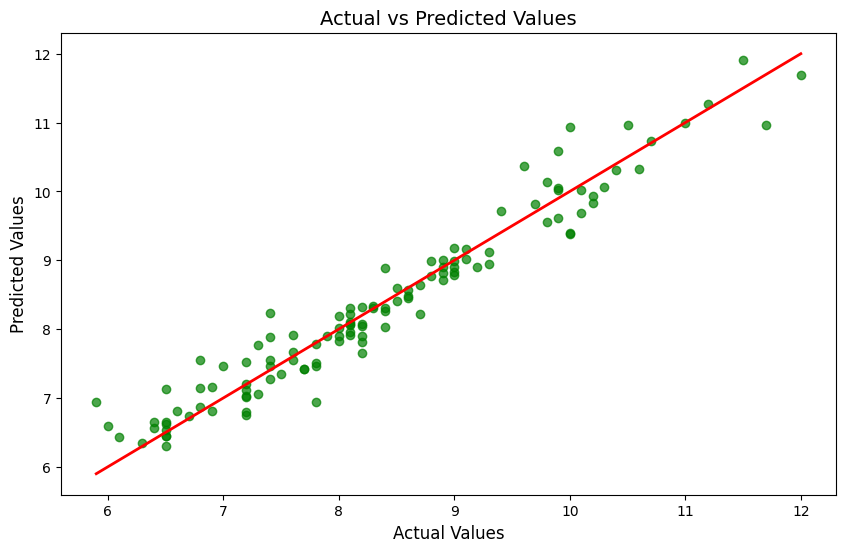

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.title('Actual vs Predicted Values', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Line of perfect prediction
plt.show()


##### The scatter plot here shows how good the model has captured the historical data to predict future values for PM2.5 mean values. The graph perfectly goes on to show how predictive model has captured 94% of variance in PM2.5 levels.

## Health Predictions
##### Now that we have worked on the air quality predictions, we will be starting with the health data that we have preprocessed earlier.

### 1. Inspecting the dataset

In [ ]:
# Inspecting the Health Data
print("\nHealth Data Columns:")
print(health_data.columns)

# Displaying the first few rows to understand the data
print("\nSample Rows from Health Data:")
print(health_data.head())

# Checking for missing values in the Health Data
print("\nMissing Values in Health Data:")
print(health_data.isnull().sum())

# Checking data types to identify potential issues
print("\nData Types in Health Data:")
print(health_data.dtypes)


Health Data Columns:
Index(['TimePeriod', 'GeoType', 'GeoID', 'GeoRank', 'Geography',
       'Deaths due to PM2.5 Estimated annual number (age 30+)',
       'Deaths due to PM2.5 Estimated annual rate (age 30+) per 100,000 adults',
       'Asthma emergency department visits due to PM2.5 Estimated annual number (age 18+)',
       'Asthma emergency department visits due to PM2.5 Estimated annual number (under age 18)',
       'Asthma emergency department visits due to PM2.5 Estimated annual rate (age 18+) per 100,000 adults',
       'Asthma emergency department visits due to PM2.5 Estimated annual rate (under age 18) per 100,000 children',
       'Cardiovascular hospitalizations due to PM2.5 (age 40+) Estimated annual number',
       'Cardiovascular hospitalizations due to PM2.5 (age 40+) Estimated annual rate per 100,000 adults',
       'Respiratory hospitalizations due to PM2.5 (age 20+) Estimated annual number',
       'Respiratory hospitalizations due to PM2.5 (age 20+) Estimated ann

### 2. Defining the Target variable and Features


In [ ]:
# Selecting relevant features and a target variable
X_health = health_data.drop(columns=['Deaths due to PM2.5 Estimated annual number (age 30+)', 'TimePeriod', 'Geography', 'GeoType'])
y_health = health_data['Deaths due to PM2.5 Estimated annual number (age 30+)']

# Displaying the feature and target shapes
print(f"Features shape: {X_health.shape}")
print(f"Target shape: {y_health.shape}")

Features shape: (210, 13)
Target shape: (210,)


##### The columns like TimePeriod, Geography, and GeoType seemed to us like irrelevant columns, hence we decided to drop them so as to reduce noise and potential multicollinearity.

### 3. Data Splitting and Scaling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the dataset into training and testing sets
X_train_health, X_test_health, y_train_health, y_test_health = train_test_split(
    X_health, y_health, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_health_scaled = scaler.fit_transform(X_train_health)
X_test_health_scaled = scaler.transform(X_test_health)

# Verifying the shape of the training and testing sets
print(f"Training features shape: {X_train_health_scaled.shape}")
print(f"Test features shape: {X_test_health_scaled.shape}")


Training features shape: (168, 13)
Test features shape: (42, 13)


##### We have used scaling features here so as to scale all the features which will allow each factor to be considered equally and no one feature will have adverse effect on the target varible.

### 4. Model Selection and Training

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Training the Gradient Boosting Regressor since it worked the best among others
gbr_health = GradientBoostingRegressor(random_state=42)
gbr_health.fit(X_train_health_scaled, y_train_health)

y_pred_health = gbr_health.predict(X_test_health_scaled)

# Evaluating the model
mse_health = mean_squared_error(y_test_health, y_pred_health)
r2_health = r2_score(y_test_health, y_pred_health)

print(f"Mean Squared Error (MSE): {mse_health:.2f}")
print(f"R-squared (R2) Score: {r2_health:.2f}")

Mean Squared Error (MSE): 63.14
R-squared (R2) Score: 0.93


##### The Gradient Boosting Regressor has performed well, achieving Mean Squared Error (MSE): 63.14, indicating a relatively small average squared difference between the predicted and actual values. R-squared (R2): 0.93, meaning 93% of the variance in deaths due to PM2.5 (age 30+) is explained by the model's features. This is a strong result, showing the model is effective at predicting the target variable.

### 5. Feature Importance Analysis

##### We are doing this step to understand which factors contribute the most to the predictions and what factors affect the deaths the most.

In [ ]:
import pandas as pd

# Extracting feature importances
feature_importance = gbr_health.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train_health.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)


Feature Importances:
                                              Feature  Importance
7   Cardiovascular hospitalizations due to PM2.5 (...    0.657859
9   Respiratory hospitalizations due to PM2.5 (age...    0.204380
8   Cardiovascular hospitalizations due to PM2.5 (...    0.035396
0                                               GeoID    0.028560
3   Asthma emergency department visits due to PM2....    0.027928
4   Asthma emergency department visits due to PM2....    0.023497
5   Asthma emergency department visits due to PM2....    0.006438
2   Deaths due to PM2.5 Estimated annual rate (age...    0.004989
6   Asthma emergency department visits due to PM2....    0.003201
11                                          StartYear    0.003012
10  Respiratory hospitalizations due to PM2.5 (age...    0.002562
12                                            EndYear    0.002178
1                                             GeoRank    0.000000


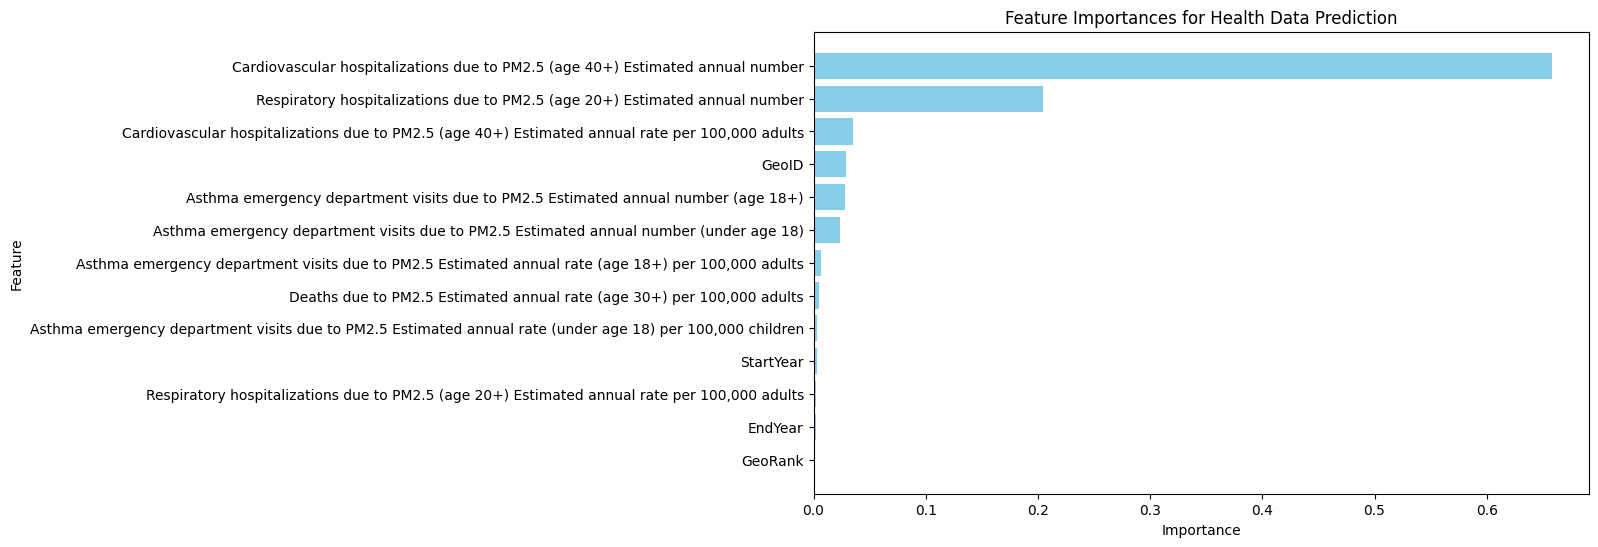

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming feature_importances_ and feature names are available
importance_df = pd.DataFrame({
    'Feature': X_train_health.columns,
    'Importance': gbr_health.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plotting bar graph
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Health Data Prediction')
plt.gca().invert_yaxis()
plt.show()

##### The most influential predictor of deaths due to PM2.5 is cardiovascular hospitalizations due to PM2.5 (age 40+), contributing 65.8% of the predictive power, followed by respiratory hospitalizations (20+) at 20.4%. Other hospitalization and asthma emergency visit data show moderate importance, while temporal features like StartYear and EndYear have minimal impact, and GeoRank contributes nothing. These insights highlight the strong link between PM2.5 exposure and hospitalization data, suggesting potential simplification by removing low-importance features.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

# Defining a scorer for MSE
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Performing cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring=mse_scorer)

# Converting negative MSE to positive for interpretation
cv_mse_scores = -cv_scores

# Calculating the mean and standard deviation
mean_cv_mse = cv_mse_scores.mean()
std_cv_mse = cv_mse_scores.std()

print(f"Cross-Validation Mean MSE: {mean_cv_mse:.2f}")
print(f"Cross-Validation MSE Standard Deviation: {std_cv_mse:.2f}")


Cross-Validation Mean MSE: 0.16
Cross-Validation MSE Standard Deviation: 0.02


##### The cross-validation results confirm that the model is performing consistently well across different data splits:
##### Mean MSE: 0.16 indicates the model's predictions are close to the actual values on average.
##### Standard Deviation: 0.02 reflects low variability, showing the model generalizes well to different subsets of the data.

### 6. Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 4]
}

# Setting up GridSearchCV
grid_search = GridSearchCV(
    estimator=gbr_health,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fitting the model with the training data
grid_search.fit(X_train_health_scaled, y_train_health)

# Best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score (MSE): {-best_score:.2f}")

# Evaluating the model on the test set with the best estimator
best_model = grid_search.best_estimator_
y_pred_health = best_model.predict(X_test_health_scaled)

# Calculating MSE and R2 score on the test set
mse_health = mean_squared_error(y_test_health, y_pred_health)
r2_health = r2_score(y_test_health, y_pred_health)

print(f"Test Set Mean Squared Error (MSE): {mse_health:.2f}")
print(f"Test Set R-squared (R2) Score: {r2_health:.2f}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}
Best Cross-Validation Score (MSE): 68.18
Test Set Mean Squared Error (MSE): 53.83
Test Set R-squared (R2) Score: 0.94


##### After doing hyperparameter tuning, we can see that with use of best parameters the accuracy increased from 93% to 94% which is not much of a significant change but still a noticeable and important change.

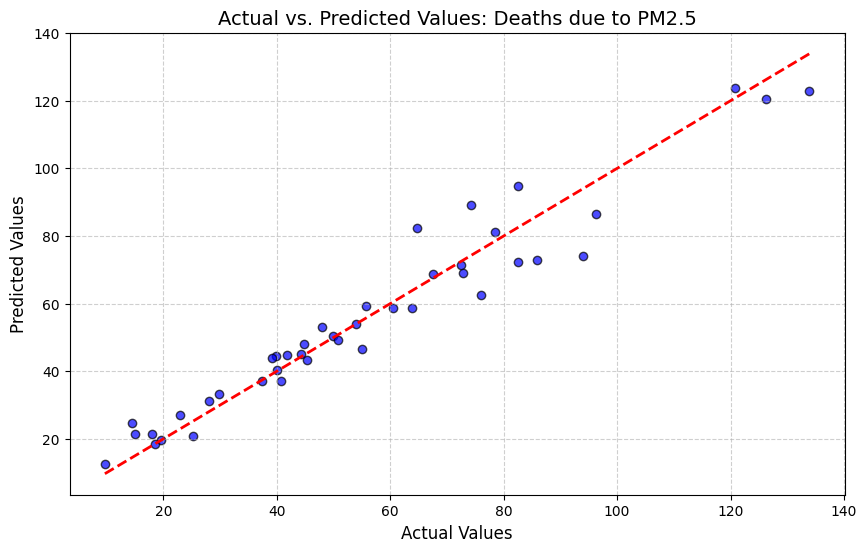

In [ ]:
import matplotlib.pyplot as plt

# Plotting scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_health, y_pred_health, alpha=0.7, color='blue', edgecolor='k')
plt.plot([y_test_health.min(), y_test_health.max()], [y_test_health.min(), y_test_health.max()], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs. Predicted Values: Deaths due to PM2.5', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


##### This graph is similar to what we created in the air quality prediction. It also goes on to show how based on the historical data the model captures the maximum data and gives about 94% of accuracy in order to predict the future deaths based on actual values caused due to PM2.5 concentration in air.

### Conclusion:
#### So, that's all for the coding part of our project. You can find detailed insights about our project in the project report where we have discussed the what's and why's in detail. The correlation between PM2.5 exposure and adverse health outcomes reinforces the need for targeted interventions to reduce pollutant levels and protect public health.